In [1]:
from codes_RF.dpqc_models import DeepQC

the folowing are the dataset accessable:
 train_input: (9258, 424, 1)
 train_label: (9258, 1)
 test_input: (3600, 424, 1)
 test_label: (3600, 1)


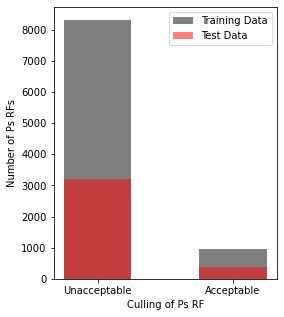

In [2]:
my_deepqc = DeepQC()                            #initialize the class
my_deepqc.load_data(label_keyword=["X5"])       #load the data into the class object (default; label_keyword="X5")
my_deepqc.stats()                               #plot the data distribution    

In [3]:
my_deepqc.add_shift(shift_factor=5)        #augment the data (default; noise_factor=40)
my_deepqc.add_scaling(scaling_factor=0.2)   #augment the data (default; low_pass=0.2)
my_deepqc.add_noise(noise_factor=0.01)      #augment the data (default; noise_factor=0.05)

the folowing are the dataset accessable:
 train_input: (10205, 424, 1)
 train_label: (10205, 1)
 test_input: (3600, 424, 1)
 test_label: (3600, 1)
the folowing are the dataset accessable:
 train_input: (11152, 424, 1)
 train_label: (11152, 1)
 test_input: (3600, 424, 1)
 test_label: (3600, 1)
the folowing are the dataset accessable:
 train_input: (12099, 424, 1)
 train_label: (20410, 1)
 test_input: (3600, 424, 1)
 test_label: (3600, 1)


initializer: he_uniform -- learning rate: 0.0001 -- decay: 1e-06 -- batch size: 256 -- kernel_size: 5
Epoch 1/100
80/80 [==============================] - 23s 239ms/step - loss: 0.0641 - accuracy: 0.9016 - f1_score: 0.7291 - val_loss: 0.0295 - val_accuracy: 0.9581 - val_f1_score: 0.8221
Epoch 2/100
80/80 [==============================] - 17s 212ms/step - loss: 0.0397 - accuracy: 0.9450 - f1_score: 0.8548 - val_loss: 0.0281 - val_accuracy: 0.9617 - val_f1_score: 0.8337
Epoch 3/100
80/80 [==============================] - 17s 209ms/step - loss: 0.0359 - accuracy: 0.9518 - f1_score: 0.8731 - val_loss: 0.0256 - val_accuracy: 0.9636 - val_f1_score: 0.8314
Epoch 4/100
80/80 [==============================] - 17s 210ms/step - loss: 0.0319 - accuracy: 0.9573 - f1_score: 0.8878 - val_loss: 0.0259 - val_accuracy: 0.9633 - val_f1_score: 0.8277
Epoch 5/100
80/80 [==============================] - 16s 206ms/step - loss: 0.0310 - accuracy: 0.9588 - f1_score: 0.8916 - val_loss: 0.0279 - val_accuracy

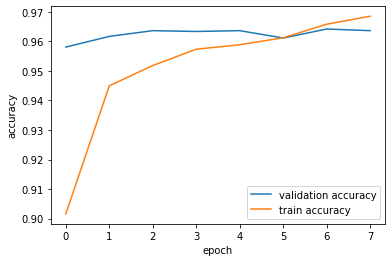

/Users/sina/anaconda3/envs/mlp/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
kernel_sizes = [5]
lr = [1e-4]
decay = [1e-6]
batch_size = [256]
initializers = ['he_uniform'] #, 'zeros', 'ones', 'random_uniform', 'random_normal', 'truncated_normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform', 'lecun_uniform', 'lecun_normal']

exit_all_loop = False
for kernel_size in kernel_sizes:
    if exit_all_loop:
        break
    for init in initializers:
        if exit_all_loop:
            break
        for LR in zip(lr, decay):
            if exit_all_loop:
                break
            for batch in batch_size:
                print("="*100,"\n", "="*100)
                print("initializer:", init, "-- learning rate:", LR[0], "-- decay:", LR[1], "-- batch size:", batch, "-- kernel_size:", kernel_size)
                print("="*100,"\n", "="*100)
                
                
                acc = my_deepqc.train(model_type="unet", initializer=init, kernel_size = kernel_size, epochs= 100, batch_size= batch, verbose= 1, lr= LR[0], decay= LR[1],
                    plot_history= True, patience= 5, min_delta= 0.001, target_accuracy = 0.95)
                if acc > 0.97:
                    exit_all_loop = True
                    break

In [ ]:
my_deepqc.train(model_type="unet", kernel_size = 7, epochs= 15, batch_size= 256, verbose= 1, lr= 1e-4, decay= 1e-6,
                plot_history= True, patience= 10, min_delta= 0.0001, target_accuracy = 0.94, initializer='he_uniform')

In [ ]:
my_deepqc.model.summary()

In [ ]:
import os
import obspy
import matplotlib.pyplot as plt

station = "CRLN"
range = [280, 300]

all = os.listdir("DATA/RF/")
all = [i for i in all if i.endswith(".pkl")]
all = [i for i in all if station in i]
tr = obspy.Stream()
for i in all:
    st = obspy.read("DATA/RF/"+i).select(channel="RFR")

    if st[0].stats.baz > range[0] and st[0].stats.baz < range[1]:
        if st[0].stats.snr > 1:
            print(i, st[0].stats.baz)
            tr += st
tr.stack()
tr.plot()
